# RankNet Search Demo

This notebook demonstrates the RankNet search engine capabilities, from initialization to searching and evaluation.

In [6]:
# Add parent directory to path
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('.'))))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Import our search engine
from src.engine import SearchEngine
from src.model import Document, Query
from src.utils import print_search_results, plot_training_history, plot_feature_importance

## 1. Initialize Search Engine

In [7]:
# Initialize search engine
engine = SearchEngine(use_ranknet=True)
print("Search engine initialized!")

Search engine initialized!


## 2. Load or Create Data

In [8]:
# Option 1: Create sample data
# engine.create_sample_data(n_docs=200)

# Option 2: Load real data (uncomment to use)
engine.load_data('data/raw/medium_data.csv')

print(f"Total documents: {len(engine.documents)}")

Đã thêm 6508 tài liệu
Đã tải 6508 tài liệu từ data/raw/medium_data.csv
Total documents: 6508


## 3. Explore Documents

In [9]:
# Show first 5 documents
for i, (doc_id, doc) in enumerate(list(engine.documents.items())[:5]):
    print(f"Document {i+1}:")
    print(f"  Title: {doc.title}")
    print(f"  Content: {doc.content[:100]}...")
    print(f"  Author: {doc.author}")
    print(f"  Tags: {doc.tags}")
    print("")

Document 1:
  Title: A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model
  Content: ...
  Author: Unknown
  Tags: []

Document 2:
  Title: Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric
  Content: ...
  Author: Unknown
  Tags: []

Document 3:
  Title: How to Use ggplot2 in Python
  Content: ...
  Author: Unknown
  Tags: []

Document 4:
  Title: Databricks: How to Save Files in CSV on Your Local Computer
  Content: ...
  Author: Unknown
  Tags: []

Document 5:
  Title: A Step-by-Step Implementation of Gradient Descent and Backpropagation
  Content: ...
  Author: Unknown
  Tags: []



## 4. Basic Search (Before Training)

In [10]:
# Try a search query
query = "machine learning tutorial"
results = engine.search(query)
print_search_results(results, query)


🔍 Search Results for: 'machine learning tutorial'

1. Humanizing Machine Learning
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://uxdesign.cc/humanizing-machine-learning-11a64feb21a8
   👀 Views: 14,000
   ⭐ Score: 0.6052

2. 12 Things I Learned During My First Year as a Machine Learning Engineer
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/12-things-i-learned-during-my-first-year-as-a-machine-learning-engineer-2991573a9195
   👀 Views: 80,000
   ⭐ Score: 0.5906

3. Fundamental Techniques of Feature Engineering for Machine Learning
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
   👀 Views: 35,000
   ⭐ Score: 0.5879

4. Machine learning interpretability techniques
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/machine-learning-interpretability-techniques-662c723454f3
   👀 Views: 5,650
   ⭐ Score: 0.5822

5. 6 reasons Microsoft has become the go-to for machine le

## 5. Train RankNet Model

Đang tạo dữ liệu huấn luyện...
Cặp huấn luyện: 188, Cặp kiểm định: 48
Epoch 10/1000 - Loss: 0.1711 - Val Loss: 0.1183
Epoch 20/1000 - Loss: 0.0450 - Val Loss: 0.0291
Epoch 30/1000 - Loss: 0.0195 - Val Loss: 0.0119
Epoch 40/1000 - Loss: 0.0109 - Val Loss: 0.0063
Epoch 50/1000 - Loss: 0.0070 - Val Loss: 0.0038
Epoch 60/1000 - Loss: 0.0048 - Val Loss: 0.0025
Epoch 70/1000 - Loss: 0.0034 - Val Loss: 0.0018
Epoch 80/1000 - Loss: 0.0026 - Val Loss: 0.0013
Epoch 90/1000 - Loss: 0.0017 - Val Loss: 0.0008
Epoch 100/1000 - Loss: 0.0011 - Val Loss: 0.0005
Epoch 110/1000 - Loss: 0.0007 - Val Loss: 0.0003
Epoch 120/1000 - Loss: 0.0005 - Val Loss: 0.0002
Epoch 130/1000 - Loss: 0.0004 - Val Loss: 0.0002
Epoch 140/1000 - Loss: 0.0003 - Val Loss: 0.0001
Epoch 150/1000 - Loss: 0.0002 - Val Loss: 0.0001
Epoch 160/1000 - Loss: 0.0002 - Val Loss: 0.0001
Epoch 170/1000 - Loss: 0.0002 - Val Loss: 0.0001
Epoch 180/1000 - Loss: 0.0001 - Val Loss: 0.0001
Epoch 190/1000 - Loss: 0.0001 - Val Loss: 0.0000
Epoch 20

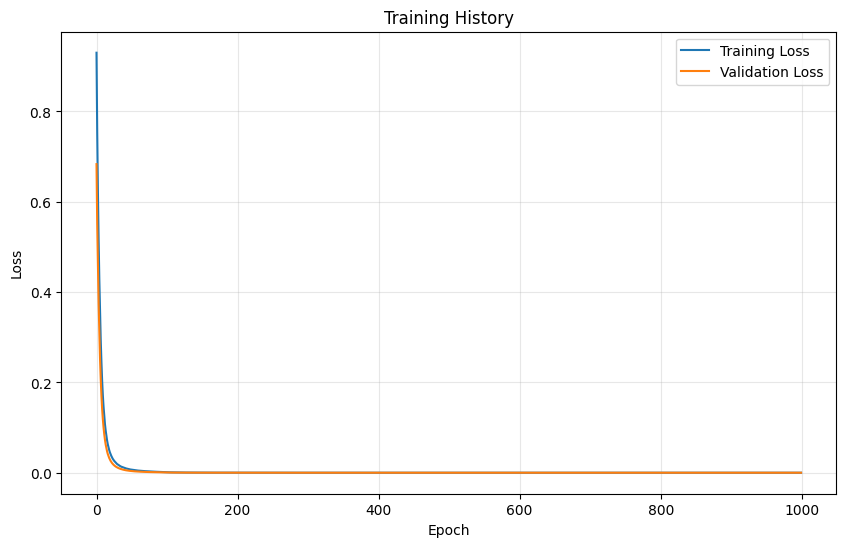

In [ ]:
# Train RankNet model
history = engine.train(epochs=50, batch_size=32)

# Plot training history
plot_training_history(history)

## 6. Search with RankNet

In [12]:
# Try the same query again
results_ranknet = engine.search(query)
print_search_results(results_ranknet, query)


🔍 Search Results for: 'machine learning tutorial'

1. A Theory of Overfitting and Underfitting in Machine Learning
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://medium.com/datadriveninvestor/a-theory-of-overfitting-and-underfitting-in-machine-learning-1a5ff85a8756
   👀 Views: 0
   ⭐ Score: 2.8322

2. David Duvenaud on the future of AI and machine learning in academia
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/david-duvenaud-on-the-future-of-ai-and-machine-learning-in-academia-7c3ae5aa290d
   👀 Views: 10
   ⭐ Score: 2.3397

3. Automating Traffic Analysis with Machine Learning
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/automating-traffic-analysis-with-machine-learning-6165a3abecb3
   👀 Views: 30
   ⭐ Score: 2.1394

4. Machine Learning — Diagnosing faults on vehicle trackers with a CNN
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/machine-learning-diagnosing-faults-on-vehicle-trackers-with-a-cnn-5b471a86b7

## 7. Compare Results

In [13]:
# Disable RankNet to compare with basic search
engine_basic = SearchEngine(use_ranknet=False)
engine_basic.documents = engine.documents  # Share same documents
engine_basic.document_index = engine.document_index
engine_basic.corpus_stats = engine.corpus_stats

basic_results = engine_basic.search(query)

# Print comparison
print("===== Basic Search Results =====")
for i, res in enumerate(basic_results[:5]):
    print(f"{i+1}. {res['title']} (Score: {res['score']:.4f})")

print("\n===== RankNet Search Results =====")
for i, res in enumerate(results_ranknet[:5]):
    print(f"{i+1}. {res['title']} (Score: {res['score']:.4f})")

===== Basic Search Results =====
1. Humanizing Machine Learning (Score: 0.6052)
2. 12 Things I Learned During My First Year as a Machine Learning Engineer (Score: 0.5906)
3. Fundamental Techniques of Feature Engineering for Machine Learning (Score: 0.5879)
4. Machine learning interpretability techniques (Score: 0.5822)
5. 6 reasons Microsoft has become the go-to for machine learning (Score: 0.5808)

===== RankNet Search Results =====
1. A Theory of Overfitting and Underfitting in Machine Learning (Score: 2.8322)
2. David Duvenaud on the future of AI and machine learning in academia (Score: 2.3397)
3. Automating Traffic Analysis with Machine Learning (Score: 2.1394)
4. Machine Learning — Diagnosing faults on vehicle trackers with a CNN (Score: 1.8103)
5. Constructivist Machine Learning (Score: 1.7606)


## 8. Evaluate Performance

In [14]:
# Evaluate search performance
metrics = engine.evaluate()
print(f"NDCG@10: {metrics['ndcg@10']:.4f}")
print(f"Number of queries: {metrics['num_queries']}")

NDCG@10: 0.0000
Number of queries: 20


## 9. Save Model

In [15]:
# Save the trained model
engine.save("data/models/")
print("Model saved to data/models/")

Đã lưu công cụ tìm kiếm vào data/models/
Model saved to data/models/


## 10. Test Different Queries

In [16]:
# Test different queries
test_queries = [
    "python programming",
    "deep learning neural networks",
    "data science tutorial"
]

for query in test_queries:
    print(f"\n\nQuery: {query}")
    results = engine.search(query, top_k=3)
    print_search_results(results)



Query: python programming

1. <strong class="markup--strong markup--h3-strong"><em class="markup--em markup--h3-em">Why is Python Programming a perfect fit for Big Data?</em></strong>
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://towardsdatascience.com/why-is-python-programming-a-perfect-fit-for-big-data-5ac54ee8f95e
   👀 Views: 1,150
   ⭐ Score: 7.4410

2. Why you should learn programming even if you are an artist
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://medium.com/datadriveninvestor/why-you-should-learn-programming-even-if-you-are-an-artist-6eaf16a374cf
   👀 Views: 310
   ⭐ Score: 2.1885

3. Top 7 Dying Programming Languages to Avoid Studying in 2019 –2020
   📝 ...
   👤 Author: Unknown
   🔗 URL: https://medium.com/datadriveninvestor/top-7-dying-programming-languages-to-avoid-studying-in-2019-2020-a4a660f4de0e
   👀 Views: 400
   ⭐ Score: 2.1076


Query: deep learning neural networks

1. PyTorch Deep Learning Nanodegree: Convolutional Neural Networks
   📝 ...
   👤 Author: Un